In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
def drawImg(img,title="Image"):
    plt.imshow(img,cmap="gray")
    plt.axis("off")
    plt.title(title+str(img.shape))
    plt.show()

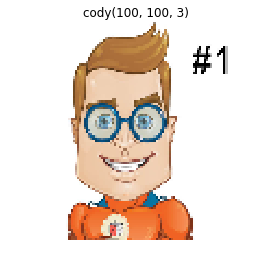

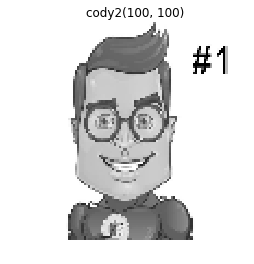

In [3]:
img = cv2.imread("./Images/SuperHuman/cody2.jpg")#BGR
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img = cv2.resize(img,(100,100))
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
drawImg(img,"cody")
drawImg(img_gray,"cody2")

### Our filter image is the 3D image as it has three channels(height,width,color scheme) . But if the color is not the relevant feature then we can use the grayscale image which is the 2D image .

# Building Convolution

In [4]:
# Hardcoded filters
def convolution(img,img_filter):
    W = img.shape[0]
    H = img.shape[1]
    
    F = img_filter.shape[0] #Assuming filter to be a square matrix
    new_img = np.zeros((W-F+1,H-F+1))
    
    for row in range(W-F+1):
        for col in range(H-F+1):
            for i in range(F):
                for j in range(F):
                    new_img[row][col]+=img[row+i][col+j]*img_filter[i][j]
                    
                if new_img[row][col]>255: # in RGB and GRAYSCALE images max value of pixel is 255.
                    new_img[row][col] = 255
                
                elif new_img[row][col]<0:
                    new_img[row][col] = 0
    
    return new_img #Activation Map
                    
    

In [5]:
blur_filter = np.ones((3,3))/9.0  #This filter will blur the image

output = convolution(img_gray,blur_filter)

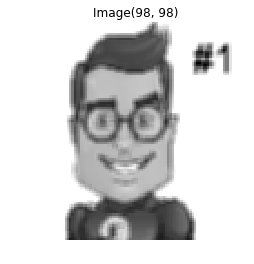

In [6]:
drawImg(output)

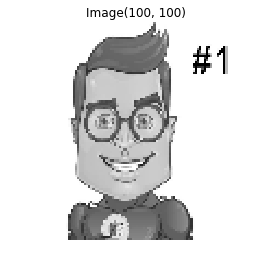

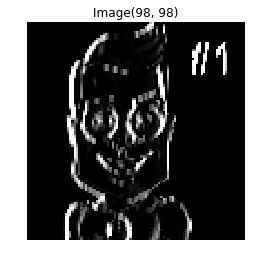

In [7]:
edge_filter = np.array([[1,0,-1],
                       [1,0,-1],
                       [1,0,-1]])
output1 = convolution(img_gray,edge_filter)
drawImg(img_gray)
drawImg(output1)

### Extracting features of image using filters

# Convolutional Layer
- contains various filters.
- each filter extracts different kinds of features and gives 1 activation map
- multiple activation maps are combined by stacking to form output volume 
- so CNN layer takes input a volume and produces an output volume of different shape. 

   # Buzzwords in CNN's
   - Convolutional layer
   - valid vs same convolution
   - Padding
   - Stride
   - Filters/Kernels
   - Pooling(Average/Maxpooling)

  # Padding Example
  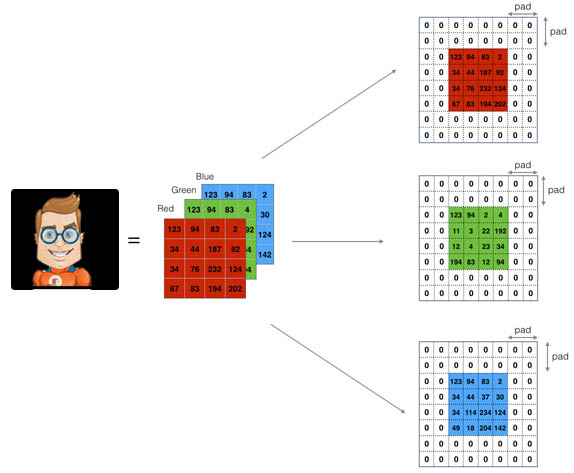

(100, 100, 3)


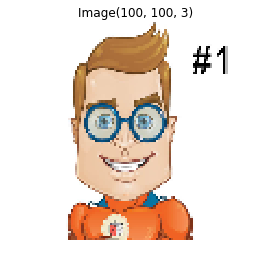

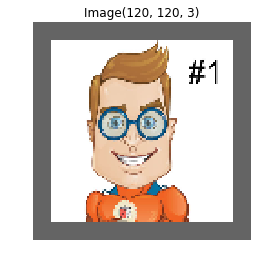

In [8]:
print(img.shape)
drawImg(img)

#Padding to the image
pd_img = np.pad(img,((10,10),(10,10),(0,0)),'constant',constant_values=100)
drawImg(pd_img)

# Stride
- Filters can have different size as well as movement
- Stride defines how a filter should move across the image
- No of pixels we skip each time is called stride.
- In our example we used a stride of (1,1) along W and H.
- You can also use a stride of(2,2) in that case the output volume will have less W and H.

# Pooling Layers
- Pooling is performed after Convolution Operation
- Two types of pooling layer - Average Pooling and Max Pooling

- Max-pooling layer: slides an ($f, f$) window over the input and stores the max value of the window in the output.

- Average-pooling layer: slides an ($f, f$) window over the input and stores the average value of the window in the output.

- It helps to reduce computation by discarding 75% of the neurons(assuming 2X2 filters with stride of 2)

- Makes feature detectors more robust
- No parameters for learning, only hyperparameters such as filter size.
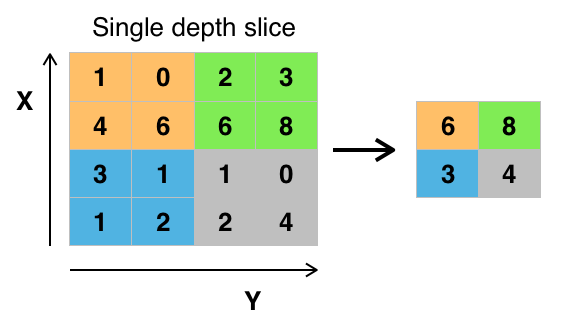

# Implementing Pooling Operation

In [9]:
X = np.array([[1,0,2,3],
              [4,6,6,8],
              [3,1,1,0],
              [1,2,2,4]])
def pooling(X,mode="max"):
    stride = 2
    f = 2 # Window size
    H,W = X.shape
    
    HO = int((H-f)/stride)+1
    WO = int((W-f)/stride)+1
    output = np.zeros((HO,WO))
    
    for r in range(HO):
        for c in range(WO):
            r_start = r*stride
            r_end = r_start+f
            c_start = c*stride
            c_end = c_start+f
            
            X_slice = X[r_start:r_end,c_start:c_end]
            if mode=="max":
                output[r][c] = np.max(X_slice)
            else:
                output[r][c] = np.mean(X_slice)
            
    return output

pooled_array = pooling(X)
print(pooled_array)
    
    
              

[[6. 8.]
 [3. 4.]]


# Dropouts
- It is the regularization technique which is used to prevent overfitting.
- It includes randomly dropping some of the neurons.
- This works with MLP as well as CNN.
- Turning off the neurons will done RANDOMLY.
- Every time some neurons are turned off, a new neural network is created.
- Final result is the average of all the results.
- For turning off neurons we will set any probability(0.3 to 0.5) , so that all the neurons with that probability will be turned off.